# Bundesratswahlen 2018

## Geschichte der BR-Wahlen seit 1848

**Quelle aller Daten: Admin.ch**

Wie viel Bundesräte pro Partei?....

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
from datetime import timedelta

In [3]:
plt.style.use('seaborn')

In [4]:
df = pd.read_csv("BR_OVERVIEW_NEU.csv")

In [5]:
df.head()

,ID,Name,Kanton,Eintritt BR,Austritt BR,Heimatort,ID Heimatort,Gewählt Wahlgang,Gewählt Stimmen,Absolutes Mehr,Stimmen ü aMehr,Partei
0,1,"Ochsenbein, Ulrich",BE,16.11.1848,31.12.1854,Nidau,NaN,1,92,67,25,FDP
1,2,"Naeff, Wilhelm Matthias",SG,16.11.1848,31.12.1875,Altstätten,NaN,1,72,65,7,FDP
2,3,"Munzinger, Martin J.",SO,16.11.1848,06.02.1855,Olten,NaN,2,71,67,4,FDP
3,4,"Furrer, Jonas",ZH,16.11.1848,25.07.1861,Winterthur,NaN,2,85,67,18,FDP
4,5,"Frey-Herosé, Friedrich",AG,16.11.1848,31.12.1866,Aarau,NaN,2,70,66,4,FDP


In [6]:
df.tail()

,ID,Name,Kanton,Eintritt BR,Austritt BR,Heimatort,ID Heimatort,Gewählt Wahlgang,Gewählt Stimmen,Absolutes Mehr,Stimmen ü aMehr,Partei
112,113,"Sommaruga, Simonetta",BE,22.09.2010,NaN,"Lugano, Eggiwil",NaN,4,159,121,38,SP
113,114,"Schneider-Ammann, Johann N.",BE,22.09.2010,NaN,Hasle bei Burgdorf,NaN,5,144,119,25,FDP
114,115,"Berset, Alain",FR,14.12.2011,NaN,Misery-Courtion,NaN,2,126,123,3,SP
115,116,"Parmelin, Guy",VD,09.12.2015,NaN,Bursins,NaN,3,138,119,19,SVP
116,117,"Cassis, Ignazio",TI,20.09.2017,NaN,Sessa,NaN,2,125,123,2,FDP


In [7]:
len(df)

117

In [8]:
df.shape

(117, 12)

## Welcher Kanton hat die meisten Bundesräte

In [9]:
df["Kanton"].value_counts()

ZH    20
VD    15
BE    14
NE     9
TI     8
SO     6
SG     5
LU     5
GE     5
AG     5
GR     4
FR     4
VS     3
TG     3
AI     2
AR     2
BS     2
ZG     2
GL     1
BL     1
OW     1
Name: Kanton, dtype: int64

In [10]:
my_title = ("Anzahl Bundesräte pro Kanton seit 1848")

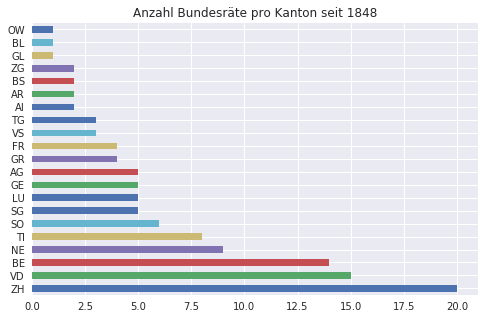

In [11]:
df["Kanton"].value_counts().head(26).plot(kind='barh', figsize=(8,5), title=my_title)

## Wie viele Wahlgänge werden benötigt

In [12]:
df["Gewählt Wahlgang"].value_counts()

1    72
2    17
3    10
5     8
4     6
6     4
Name: Gewählt Wahlgang, dtype: int64

In [13]:
my_title = ("Wie viele Wahlgänge wurden zur Wahl benötigt?")

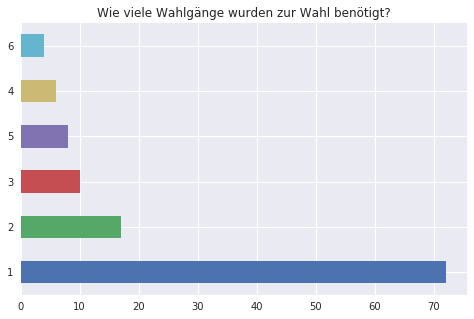

In [14]:
df["Gewählt Wahlgang"].value_counts().head(10).plot(kind='barh', figsize=(8,5), title=my_title)

## Wie viele Bundesräte pro Partei

In [15]:
df["Partei"].value_counts()

FDP                            70
CVP                            20
SP                             14
SVP                            10
BDP                             2
LIBERALE PARTEI DER SCHWEIZ     1
Name: Partei, dtype: int64

In [16]:
my_title = ("Wie viele Bundesräte pro Partei?")

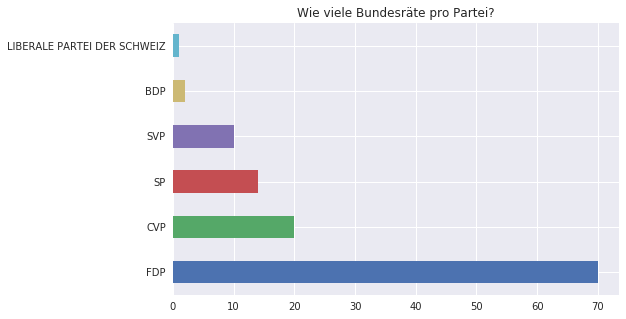

In [17]:
df["Partei"].value_counts().head(10).plot(kind='barh', figsize=(8,5), title=my_title)

## Wer wurde mit Glanzresultat gewählt

In [18]:
df.groupby("Name")["Stimmen ü aMehr"].sum().sort_values(ascending=False).head(15)

Name
Hoffmann, Arthur      89
Motta, Giuseppe       84
Feldmann, Markus      82
Decoppet, Camille     80
Graber, Pierre        77
Holenstein, Thomas    74
Aubert, Pierre        73
Ador, Gustave         71
Gnägi, Rudolf         68
Honegger, Fritz       68
Schaffner, Hans       67
Escher, Josef         66
Perrier, Louis        63
Comtesse , Robert     59
Haab, Robert          58
Name: Stimmen ü aMehr, dtype: int64

In [46]:
df.groupby("Name")["Stimmen ü aMehr"].sum().sort_values(ascending=False).head(5)

Name
Hoffmann, Arthur     89
Motta, Giuseppe      84
Feldmann, Markus     82
Decoppet, Camille    80
Graber, Pierre       77
Name: Stimmen ü aMehr, dtype: int64

In [19]:
my_title = ("Wer wurde mit Glanzresultat gewählt?")

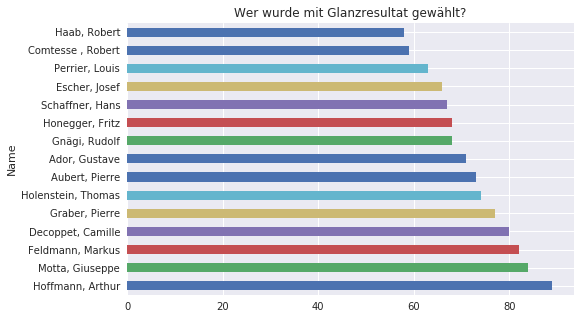

In [20]:
df.groupby("Name")["Stimmen ü aMehr"].sum().sort_values(ascending=False).head(15).plot(kind='barh', figsize=(8,5), title=my_title)

## Wer knapp über dem absoluten Mehr

In [21]:
df.groupby("Name")["Stimmen ü aMehr"].sum().sort_values(ascending=False).tail(20)

Name
Metzler-Arnold, Ruth              3
Ruchonnet , Antoine Louis John    3
Widmer-Schlumpf, Eveline          3
Challet-Venel, Jean-Jacques       3
Kopp, Elisabeth                   3
Frey, Emil                        3
Berset, Alain                     3
Egli, Alphons                     2
Cassis, Ignazio                   2
Ritschard, Willi                  2
Blocher, Christoph                2
Schenk, Karl                      1
Stich, Otto                       1
Franscini, Stefano                1
Droz, Numa                        0
Pioda, Giovanni Battista          0
Hammer, Bernhard                  0
Maurer, Ueli                      0
Meyer, Albert                     0
Deiss, Joseph                     0
Name: Stimmen ü aMehr, dtype: int64

In [22]:
my_title = ("Wer rutschte knapp in den Bundesrat?")

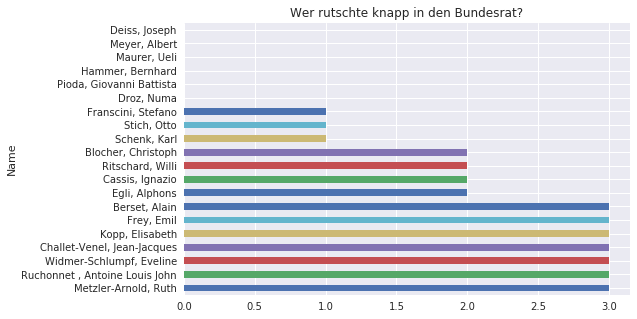

In [23]:
df.groupby("Name")["Stimmen ü aMehr"].sum().sort_values(ascending=False).tail(20).plot(kind='barh', figsize=(8,5), title=my_title)

## Übersicht über Parteien und Anzahl Wahlgänge

In [24]:
df.groupby("Partei")["Gewählt Wahlgang"].value_counts(ascending= False).head(30)

Partei                       Gewählt Wahlgang
BDP                          2                    1
                             6                    1
CVP                          1                   15
                             2                    2
                             4                    1
                             5                    1
                             6                    1
FDP                          1                   43
                             2                   11
                             3                    5
                             5                    5
                             4                    4
                             6                    2
LIBERALE PARTEI DER SCHWEIZ  1                    1
SP                           1                    8
                             3                    2
                             5                    2
                             2                    1
                  

## Übersicht über Parteien und Stimmen über absolutem Mehr


In [25]:
df.groupby("Stimmen ü aMehr")["Partei"].value_counts(ascending=False).head(120)

Stimmen ü aMehr  Partei                     
0                FDP                            4
                 CVP                            1
                 SVP                            1
1                FDP                            2
                 SP                             1
2                CVP                            1
                 FDP                            1
                 SP                             1
                 SVP                            1
3                FDP                            4
                 BDP                            1
                 CVP                            1
                 SP                             1
4                FDP                            3
                 BDP                            1
5                FDP                            4
6                FDP                            2
                 CVP                            1
7                FDP                            4
8    

## Wer war am längsten Bundesrat, wer am wenigsten lang

In [26]:
df["Eintritt neu"] = pd.to_datetime(df["Eintritt BR"], format="%d.%m.%Y")

In [27]:
df['Austritt neu'] = pd.to_datetime(df['Austritt BR'], format="%d.%m.%Y")

In [28]:
df.head()

,ID,Name,Kanton,Eintritt BR,Austritt BR,Heimatort,ID Heimatort,Gewählt Wahlgang,Gewählt Stimmen,Absolutes Mehr,Stimmen ü aMehr,Partei,Eintritt neu,Austritt neu
0,1,"Ochsenbein, Ulrich",BE,16.11.1848,31.12.1854,Nidau,NaN,1,92,67,25,FDP,1848-11-16,1854-12-31
1,2,"Naeff, Wilhelm Matthias",SG,16.11.1848,31.12.1875,Altstätten,NaN,1,72,65,7,FDP,1848-11-16,1875-12-31
2,3,"Munzinger, Martin J.",SO,16.11.1848,06.02.1855,Olten,NaN,2,71,67,4,FDP,1848-11-16,1855-02-06
3,4,"Furrer, Jonas",ZH,16.11.1848,25.07.1861,Winterthur,NaN,2,85,67,18,FDP,1848-11-16,1861-07-25
4,5,"Frey-Herosé, Friedrich",AG,16.11.1848,31.12.1866,Aarau,NaN,2,70,66,4,FDP,1848-11-16,1866-12-31


In [29]:
# df["Zeitspanne"] =df["Eintritt neu"]-df["Austritt neu"]

In [30]:
df["Zeitspanne"] = pd.Series(delta.days for delta in (df['Austritt neu'] - df['Eintritt neu']))

In [31]:
df.head()

,ID,Name,Kanton,Eintritt BR,Austritt BR,Heimatort,ID Heimatort,Gewählt Wahlgang,Gewählt Stimmen,Absolutes Mehr,Stimmen ü aMehr,Partei,Eintritt neu,Austritt neu,Zeitspanne
0,1,"Ochsenbein, Ulrich",BE,16.11.1848,31.12.1854,Nidau,NaN,1,92,67,25,FDP,1848-11-16,1854-12-31,2236.0
1,2,"Naeff, Wilhelm Matthias",SG,16.11.1848,31.12.1875,Altstätten,NaN,1,72,65,7,FDP,1848-11-16,1875-12-31,9906.0
2,3,"Munzinger, Martin J.",SO,16.11.1848,06.02.1855,Olten,NaN,2,71,67,4,FDP,1848-11-16,1855-02-06,2273.0
3,4,"Furrer, Jonas",ZH,16.11.1848,25.07.1861,Winterthur,NaN,2,85,67,18,FDP,1848-11-16,1861-07-25,4634.0
4,5,"Frey-Herosé, Friedrich",AG,16.11.1848,31.12.1866,Aarau,NaN,2,70,66,4,FDP,1848-11-16,1866-12-31,6619.0


In [32]:
versuch = df["Zeitspanne"] / 365

In [33]:
df.groupby("Name")["Zeitspanne"].sum().sort_values(ascending=False).head(20)

Name
Schenk, Karl                      11541.0
Deucher, Adolf                    10683.0
Motta, Giuseppe                   10267.0
Naeff, Wilhelm Matthias            9906.0
Etter, Philipp                     9409.0
Welti, Emil                        9154.0
Müller, Eduard                     8850.0
Schulthess, Edmund                 8307.0
Knüsel , Melchior Josef Martin     7475.0
Frey-Herosé, Friedrich             6619.0
Droz, Numa                         6223.0
Petitpierre, Max                   6042.0
Zemp, Joseph                       6026.0
Pilet-Golaz, Marcel                5862.0
Leuenberger, Moritz                5513.0
Furgler, Kurt                      5502.0
Hammer, Bernhard                   5500.0
Forrer, Ludwig                     5499.0
Villiger, Kaspar                   5446.0
Musy, Jean-Marie                   5254.0
Name: Zeitspanne, dtype: float64

In [34]:
my_title = ("Welcher BR war am längsten im Amt?")

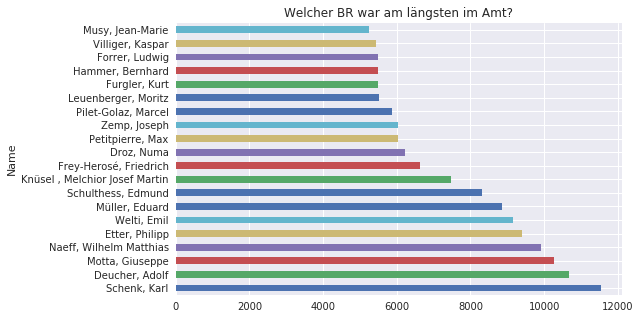

In [35]:
df.groupby("Name")["Zeitspanne"].sum().sort_values(ascending=False).head(20).plot(kind='barh', figsize=(8,5), title=my_title)

In [36]:
df.groupby("Name")["Zeitspanne"].sum().sort_values(ascending=False).tail(30)

Name
Ruffy, Eugène                  2147.0
Obrecht, Hermann               1945.0
Felber, René                   1939.0
Honegger, Fritz                1850.0
Anderwert , Fridolin           1842.0
Wetter, Ernst                  1842.0
Holenstein, Thomas             1841.0
Lepori, Giuseppe               1841.0
Metzler-Arnold, Ruth           1756.0
Kopp, Elisabeth                1563.0
Escher, Josef                  1547.0
Bavier , Simeon                1487.0
Egli, Alphons                  1484.0
Blocher, Christoph             1482.0
Schobinger, Josef Anton        1258.0
Borel, Eugène                  1119.0
Heer, Joachim                  1117.0
Bourgknecht, Jean              1018.0
Ador, Gustave                   918.0
Weber, Max                      780.0
Ruffy, Victor                   754.0
Friedrich, Rudolf               682.0
Perrier, Louis                  430.0
Parmelin, Guy                     0.0
Cassis, Ignazio                   0.0
Berset, Alain                     0.0
Schneid

In [37]:
my_title= ("Wer verliess den BR am Schnellsten wieder?")

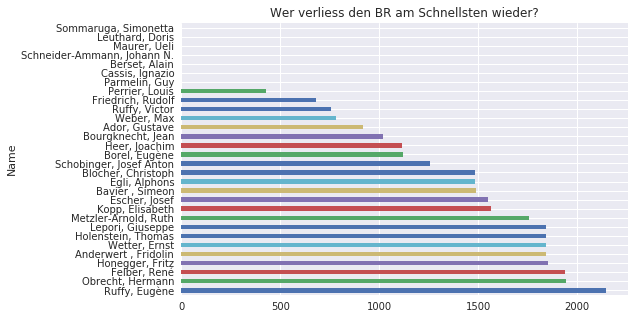

In [38]:
df.groupby("Name")["Zeitspanne"].sum().sort_values(ascending=False).tail(30).plot(kind='barh', figsize=(8,5), title=my_title)

In [ ]:
# Python3 code to convert given  
# number of days in terms of  
# Years, Weeks and Days 
  
DAYS_IN_WEEK = 7
  
# Function to find  
# year, week, days  
def find( number_of_days ): 
  
    # Assume that years is 
    # of 365 days 
    year = int(number_of_days / 365) 
    week = int((number_of_days % 365) / 
                DAYS_IN_WEEK) 
    days = (number_of_days % 365) % DAYS_IN_WEEK 
      
    print("years = ",year, 
          "\nweeks = ",week, 
          "\ndays = ",days) 
      
# Driver Code 
number_of_days = 200
find(number_of_days) 